# Домашнее задание 2

**Выполнил:** <ФИО>

**На сколько выполнил:** <Укажите, на сколько баллов по вашему мнению вы сделали>

**Правила игры:**

* возле каждой задачи указано число баллов (в сококупности можно получить 10 баллов)

* дополнительные задачи выделены звездочкой (также указано число баллов). Данные баллы можно будет использовать для улучшения результата за любое домашнее задание

* хотим чистый, читабельный код)

## Часть 1. ООП

Сделаем некоторую упрощенную модель системы доставки заказов (в качестве примеров: Самокат, Лавка, Ozon Express).

Какие сущности у нас есть внутри модели? Давайте нарисуем некоторую картину мира, как у нас это все выглядит:



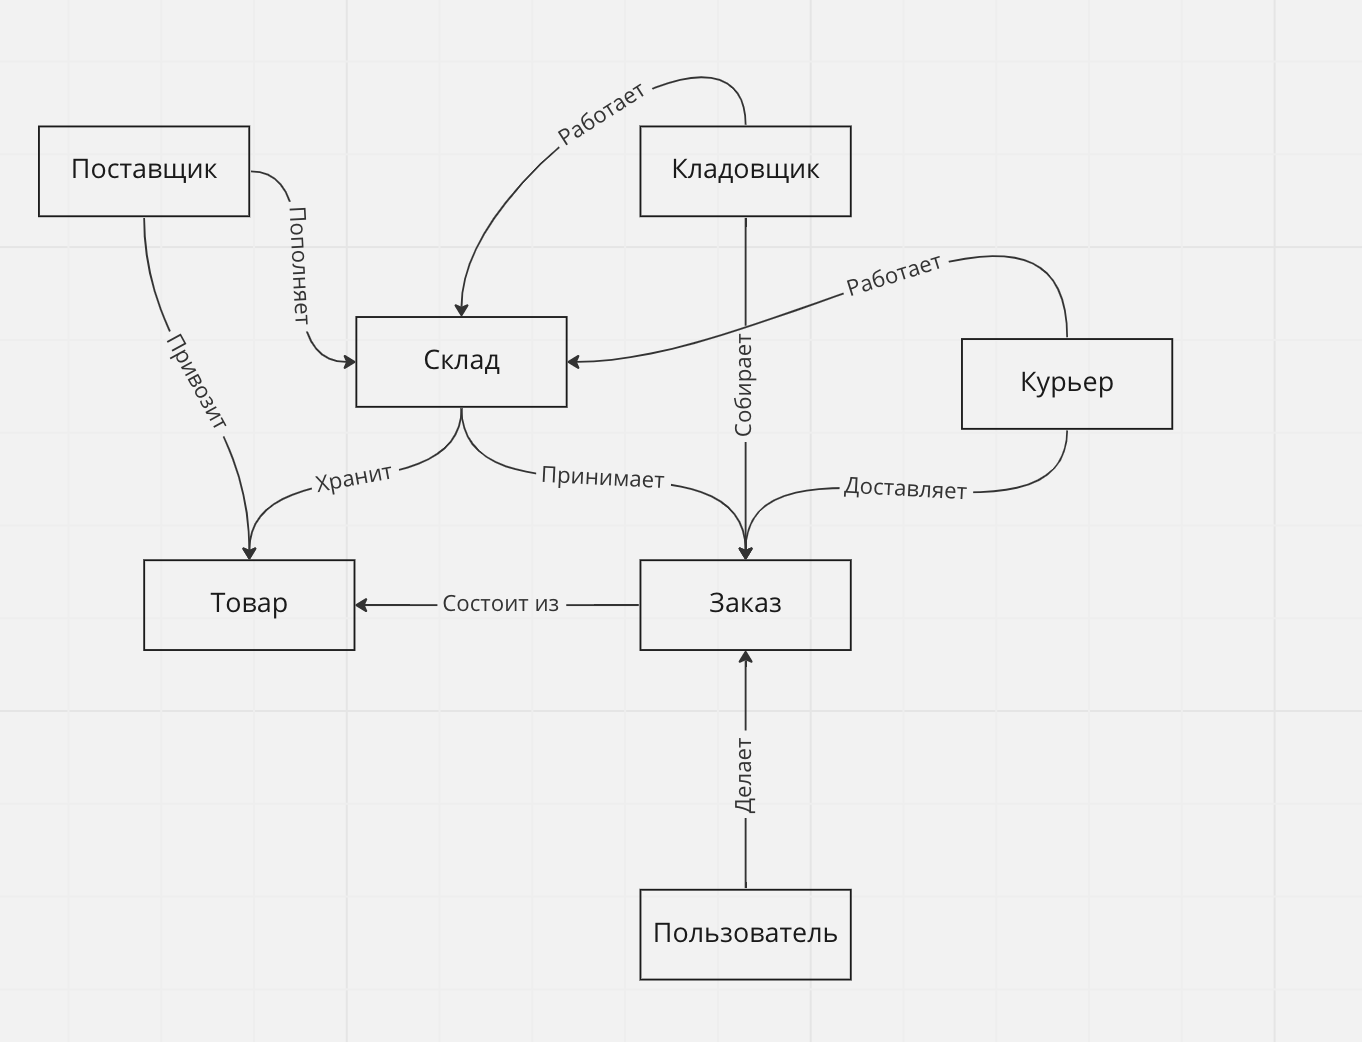

То есть основных сущностей у нас 7 (на самом деле 6, потому что курьер/кладовщик может быть единой сущностью работник, просто получать разную работу)

Что нам надо реализовать?

1. Сами сущности (которые являются классами)

2. Функции взаимодействия (как заказать, как принять, распределить курьеров etc)

Какой общий флоу работы системы?

1. Склад делает заказы для поставщиков, которые привозят товар, если он есть (если нет, то привозит столько, сколько может)

2. Поставщик привозит товар, склад пополняет стоки (сток - это сколько каждого товара хранится на складе, по сути, инвентаризацию делают)

3. Каждый работник приходит в склад, склад выдает работу (на сколько часов назначить смену решает сам работник)

4. Пользователи регистрируются, указывают свой адрес и создают заказ (указывают, что они хотят заказать)

5. Заказ приходит на склад, проверяет, что есть (если чего-то нет, то просто не добавляет в заказ, и далее обновляет свои стоки) и назначает сборщика, а затем курьера, который будет доставлять заказ (важно, чтобы на 2 момента времени: сборки и взятия из склада люди должны быть)

6. Сборщик собирает заказ (сборка одного id товара занимает 45 секунд) и затем отдает курьеру заказ

7. Курьер забирает заказ со склада и приносит его пользователю. Как рассчитать время доставки:

* есть координаты склада и координаты пользователя (давайте считать, что координаты принимают значения от 1 до 100, расстояние вычисляется как на координатной плоскости), для того, чтобы пройти 1 у.е. расстояния необходимо 30 секунд + для того, чтобы выйти со склада нужна 1 минута + процесс выдачи пользователю товара также длится 1 минута

8. После доставки заказа курьер возвращается на склад (пока он вовзращается на склад на него нельзя повесить заказ, время возврата = времени, чтобы дойти от склада до пользователя)

9. Когда у рабочего заканчивается смена, он получает деньги (давайте считать из расчета 300р/час), и далее может поставить новую смену

### Задание 1 (3 балла)

Реализовать данную систему через ООП и продемонстрировать ее работу (то есть протестировать, достаточно assertов)

В данной ситуации можно считать, что склад один

В помощь написали самое начало всей структуры (это далеко не все, мы будем проверять, как вы сделали структуру)

Ограничения:

* Пользователь не может иметь больше полей, чем изначально указано (то есть надо запретить добавлять поля, сделать их приватными), аналогично с курьерами и складами (мы же не хотим, чтобы кто-то что-то взломал)

* Для работников необходимо реализовать абстрактный класс, от которого будет наследование

* Реализация времени можно делать с помощью модуля time

* Основной код должен выглядеть как взаимодействие между объектами класса (не считая инициализаций)

In [ ]:
from dataclasses import dataclass

@dataclass
class Item:
    pass

# Что должно быть? Id внутри системы складов, id внутри системы поставщика, название, себестоимость

class Provider: # поставщик
    def send_order():
        pass
    
    # send_order - принять и отправить заказ складу

    def update_stocks():
        pass

    # update_stocks - обновить число товаров на складе

class Worker:
    def get_order():
        pass

    # принять заказ, если возможно

    def get_shift():
        pass

    # получить смену, когда работает

class Courier(Worker):
    pass

class Storekeeper(Worker):
    pass

class Store:
    def send_request():
        pass
    
    # send_request - отправить заказ для провайдера (что привезти)

    def take_order():
        pass

    # принять заказ и начать его обрабатывать

    def set_courier():
        pass

    # дать заказу курьера

    def set_storekeeper():
        pass

    # дать заказу кладовщика

    def get_worker():
        pass

    # взять работника к себе и дать ему смену

@dataclass
class Order:
    pass

# Что находится в заказе? Статус доставки, список товаров, время создания-время доставки, кто собирал-доставлял

class User:
    def make_order():
        pass

    # сделать заказ

    def take_order():

    # забрать заказ


### Задание 2* (4 балла)

Сделайте систему больше: добавьте несколько складов (заказ получает тот склад, который может быстрее обработать заказ и тот склад, который работает), добавьте ожидаемое время доставки

Добавьте время работы склада (не все склады могут работать круглосуточно)

Добавьте обработку ожиданий с клиентом: если каких-то товаров на складе нет, то клиент может полностью отказаться от заказа (необходимо спросить)

Также курьер с определенной вероятностью может просто не явиться склад (тогда ему надо назначить штраф)

## Часть 2. Telegram-bot

### Задание 3 (2 балла)

Создайте телеграм-бота со следующими inline-опциями:

* Сделать кого-то в чате админом

* Забанить/разбанить человека в чате

* Достать статистику по чату: сколько людей, сколько админов

* Заставить бота самого уйти из чата

А также чтобы по приходу нового пользователя в чат он ему задавал вопрос (на ваш выбор)

В качестве результата необходимо прислать:

(1) Ссылку на образ в Docker Hub (который мы будем проверять)

(2) Код задания на Github

### Задание 4* (2 балла)

Если вы захотите добавить что-то еще и потренироваться в ботах в телеге - добавляйте, оценим)

## Часть 3. Парсим страницу через BS

В это дз мы будем парсить сайт [ИА "Панорама"](https://panorama.pub/) - это сайт с выдуманными новостями, наполненные бредом (но при этом очень часто многие люди ссылаются на эти новости, как на реальные)


### Задание 5 (0,5 балла)

Выведите все кликабельные ссылки внутри главной страницы сайта (ведущие на страницы внутри Панорамы, без внешних ссылок) и выведите текст (если он есть), на который навешана гиперссылка

### Задание 6 (1 балл)

Напишите функцию, которая будет принимать 2 даты (начала и конца) и возвращать для всех новостей заданного периода:

* название новости

* ссылку на нее

* рейтинг новости

* число комментариев к новости 

(Для референса куда смотреть: https://panorama.pub/news/19-10-2022)

### Задание 7 (1 балл)

Напишите функцию, которая по заданному разделу (Политика, Экономика, Общество, Наука) и по заданному временному периоду выдает топ-10 аббревиатур, использующиеся в статьях (если аббревиатура встречается несколько раз в одной статье, то считаем это за 1 раз)

Например, самая часто встречающаяся аббревиатура в новостях про политику за 15 сентября - ЖКХ, ШОС, ООН, РФ, ЛГБТ, КНДР, ЛНР

### Задание 8 (1,5 балла)

Найдите топ-5 самых активных комментаторов по заданному временному периоду (будем считать, что коментатор определяется своим ником), у которых больше 2 букв в нике

Самый активный - самое большое число комментариев

### Задание 9* (0,3 балла)

Скиньте ссылку на самую понравившуюся новость из Панорамы)

## Часть 4. Тренируем регулярки

### Задание 10 (0,2 балла)

Из заданной строки сделайте акроним (то есть взять все первые буквы, сделать капсом и соединить в одно слово)

```
Микоян Артем славный сын армянского народа дарит радость авиаторам -> МАССАНДРА
```

### Задание 11 (0,4 балла)

Допустим, что вы написали код, называя переменные в CamelCase и в under_score. А вы хотите взять все и перевести в единый стиль (under_score)

Сделайте это с помощью регулярных выражений

```
MyName + my_surname -> my_name + my_surname
```

Примечание: CamelCase может выглядеть как "MyName", так и как "myName"

### Задание 12 (0,4 балла)

Большие целые числа удобно читать, когда цифры в них разделены на тройки пробелами. Переформатируйте все целые числа в тексте.

```
234533 человека выпили 12,5л пива -> 234 533 человека выпили 12,5л пива
```

Примечание: числа, которые надо возвести в куб, считаются только 2 форматов:

```
12324 -> 12 345
-12411 -> -12 345
```

Все остальные необходимо игнорировать (типа 12-ый, 12,5л etc)

## Попугай для дз

![](https://cdn.download.ams.birds.cornell.edu/api/v1/asset/122681971/1800)

Опять возвращаемся к черным какаду (на этот раз какаду похож на какаду, нет такого сильно изогнутого клюва, как у обычного черного какаду). Это траурный какаду Бэнкса (в английской литературе это red-tailed black cockatoo), чаще всего у них на перьях хвоста есть красная часть (вот там, где на картинке у папуга желтоватый цвет на хвосте)

Чем они примечательны? Ну, во-первых, они космически выглядят!

![](https://i0.wp.com/www.australiangeographic.com.au/wp-content/uploads/2020/05/red-tailed-black-cockatoo.jpg?fit=2500%2C1470&ssl=1)

Во-вторых, они очень сильные и могут расколоть бразильский орех (очень быстро) или кокос (не за 2 минуты, но более чем могут), но вообще их основной рацион питания - семена эвкалипта. И в-третьих, они интересны для биологов, потому что недавно было открыто, что начали появляться новые подвиды со своими особенностями.

А также, согласно верованиям некоторых народов Австралии, именно эти траурные какаду сопровождают душу в рай (так что если увидите такого какаду, то это к счастью, хоть он и черного цвета)